In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Exploratory data Analysis

In [3]:
df_raw=pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df_raw.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df_raw.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df_raw.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [8]:
df_raw.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df_raw["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [10]:
df_raw["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [11]:
#Description of data:
#Gender - M/F/Others
#SmokingHistory - never/former/notcurrent/ever/current/NoInfo
#Age,BMI,HbA1c_Level - numeral
#Hypertension,HeartDisease,Diabetes - 0/1

#DATACLEAN:Remove indexs with NoInfo on smoking_History as values results in inconclusive data
#DATACLEAN:Due to low number of 'Other' in 'gender' compared to other entries, omit index with 'other' as not enough sample pool to analyse

In [12]:
df = df_raw.copy()
df = df[(df['smoking_history'] != 'No Info') & (df['gender'] != 'Other')]

In [13]:
print(df['gender'].unique())
df["gender"].value_counts()

['Female' 'Male']


gender
Female    38852
Male      25320
Name: count, dtype: int64

In [14]:
print(df['smoking_history'].unique())
df["smoking_history"].value_counts()

['never' 'current' 'former' 'ever' 'not current']


smoking_history
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: count, dtype: int64

In [15]:
diabetes_values = df['diabetes']
print(diabetes_values.unique())
print(diabetes_values.value_counts())

[0 1]
diabetes
0    57126
1     7046
Name: count, dtype: int64


In [16]:
#Data Analysis

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cat_df = df.select_dtypes(include=['object'])

In [18]:
numeric_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...
99992,26.0,0,0,34.34,6.5,160,0
99993,40.0,0,0,40.69,3.5,155,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [19]:
cat_df

,gender,smoking_history
0,Female,never
2,Male,never
3,Female,current
4,Male,current
5,Female,never
...,...,...
99992,Female,never
99993,Female,never
99997,Male,former
99998,Female,never


<Figure size 700x500 with 0 Axes>

<Axes: >

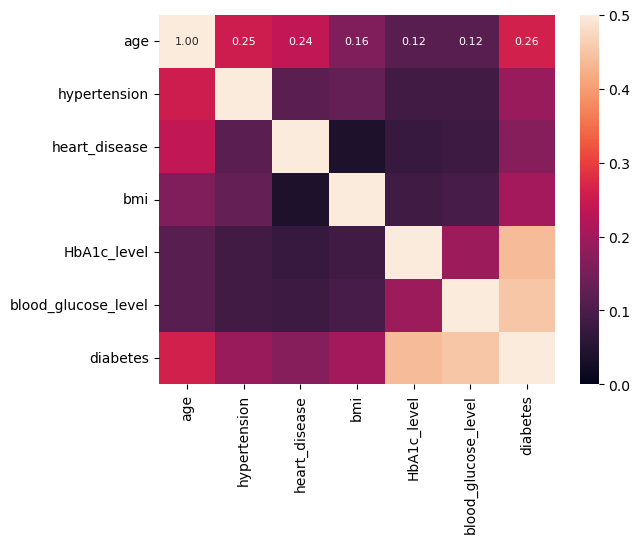

In [20]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(7, 5))
plt.show()
sns.heatmap(numeric_df.corr(), vmin=0.0, vmax=0.5, annot=True, fmt=".2f",annot_kws={"size": 8})

In [21]:
#hba1c Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HbA1c_level', ylabel='Count'>

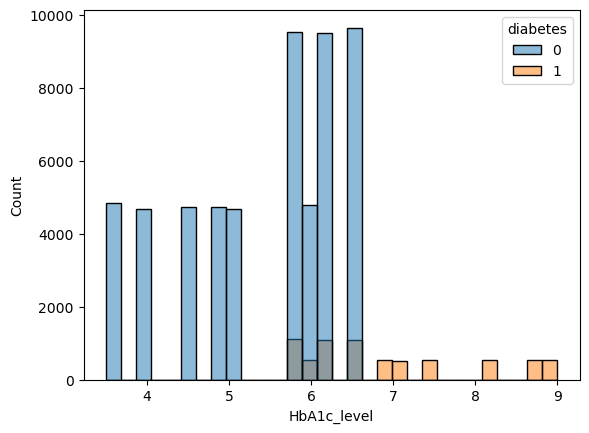

In [22]:
sns.histplot(data=numeric_df, x="HbA1c_level",hue="diabetes",bins=30)

In [23]:
#From graph, higher HbA1c_level causes higher risk of diabetes. 
#From 0 to 5.5, there are no case of diabetes. 
#From 5.8 to 6.7, there is significant percentage of individuas with diabetes.
#From 6.8 and above, all individuals have diabetes.

In [24]:
#Blood Glucose Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='blood_glucose_level', ylabel='Count'>

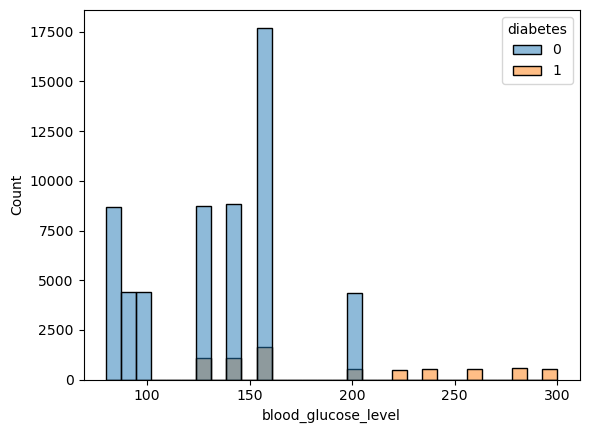

In [25]:
sns.histplot(data=df, x="blood_glucose_level",hue="diabetes",bins=30)

In [26]:
#From graph, higher blood glucose level causes higher risk of diabetes. 
#From 0 to 110, there are no case of diabetes. 
#From 120 to 210, there is significant percentage of individuals with diabetes.
#From 220 and above, all individuals have diabetes.

In [27]:
#Age analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

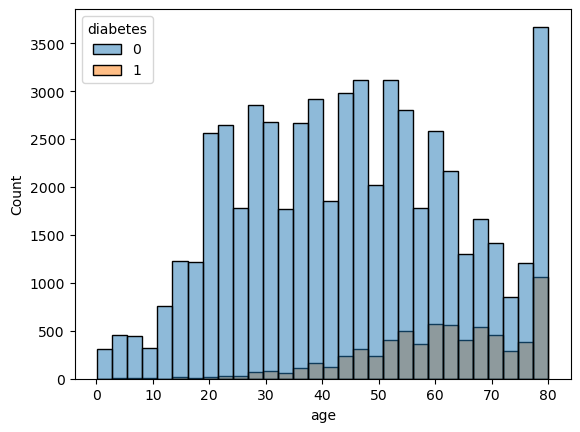

In [28]:
sns.histplot(data=df, x="age",hue="diabetes",bins=30)

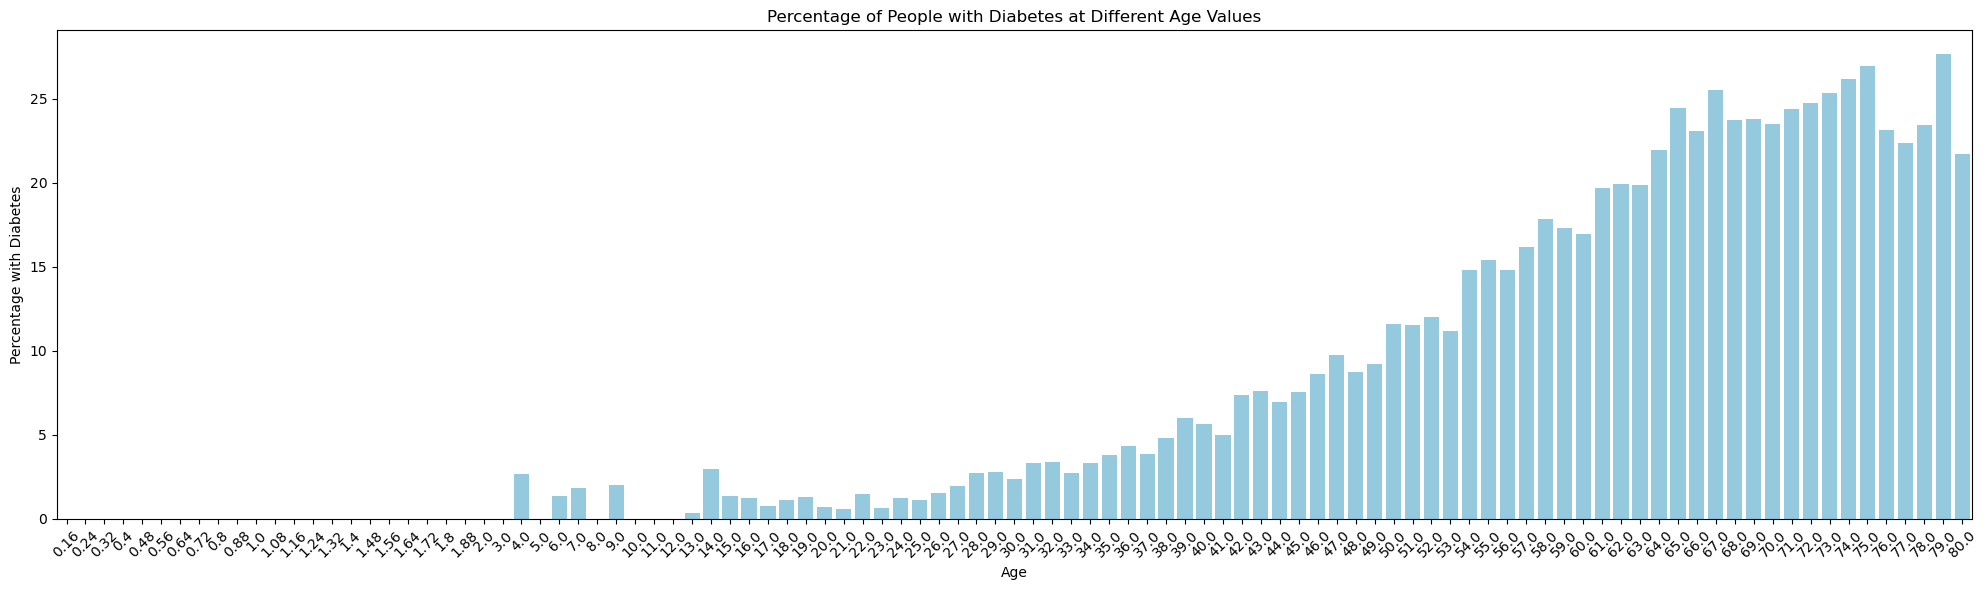

In [29]:
diabetic_individuals = df[df['diabetes'] == 1]
percentage_diabetes_by_age = diabetic_individuals.groupby('age').size() / df.groupby('age').size() * 100
plt.figure(figsize=(20, 6))
sns.barplot(x=percentage_diabetes_by_age.index, y=percentage_diabetes_by_age.values, color='skyblue')
plt.title('Percentage of People with Diabetes at Different Age Values')
plt.xlabel('Age')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
#Increasing trend of diabetes as age increases
#Older people are more at risk of diabetes

In [31]:
#BMI analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

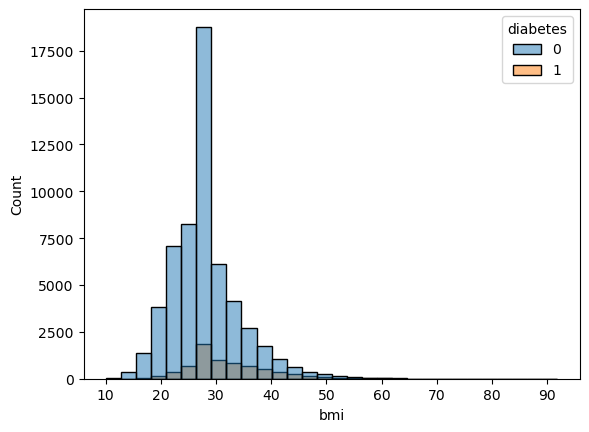

In [32]:
sns.histplot(data=df, x="bmi",hue="diabetes",bins=30)

In [33]:
df['bmi'] = df['bmi'].astype(int)

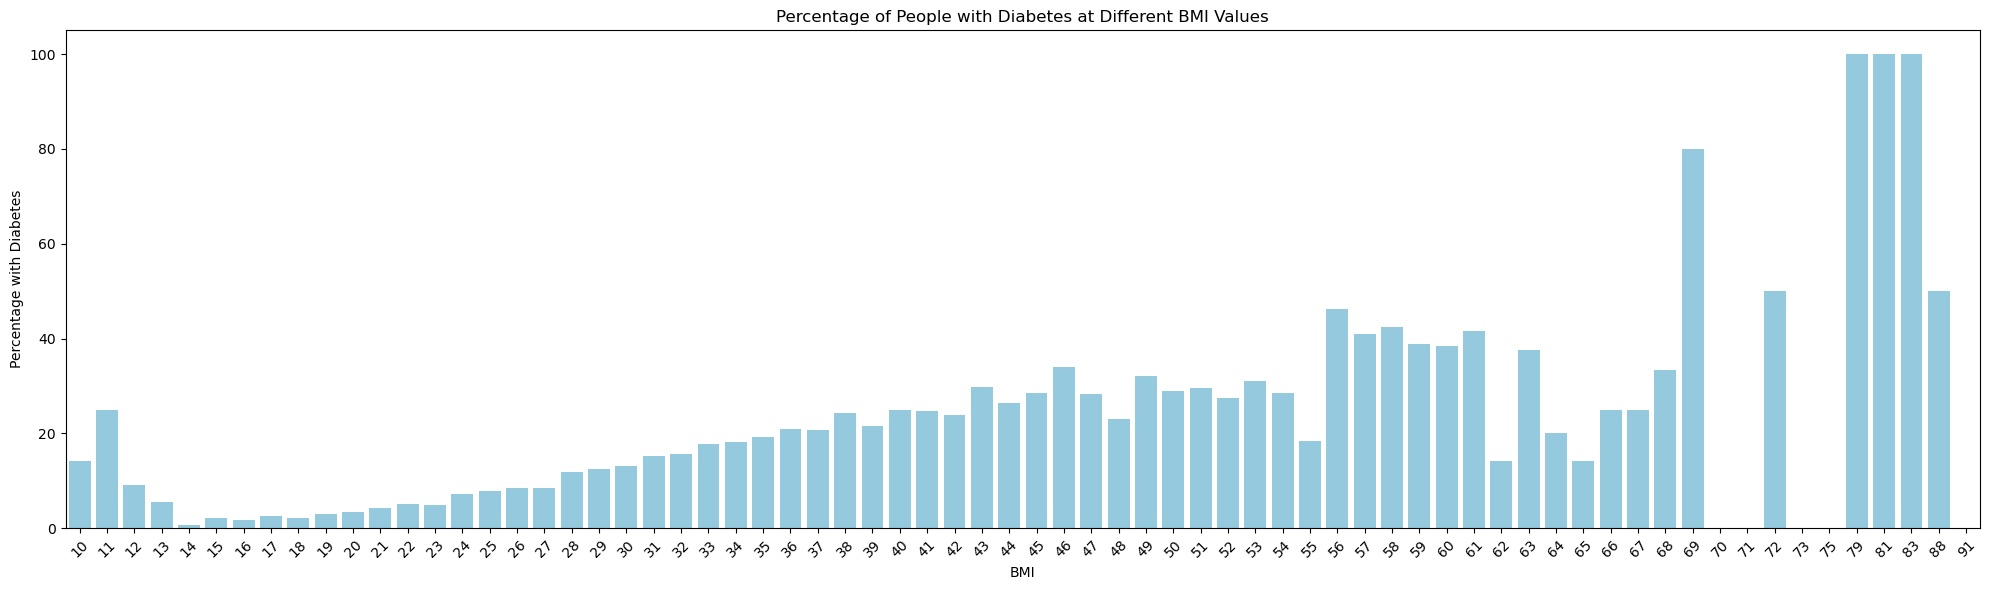

In [34]:
# Assuming df is your DataFrame containing the data
# Filter the dataset to include only individuals with diabetes
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the percentage of people with diabetes at each age value
percentage_diabetes_by_bmi = diabetic_individuals.groupby('bmi').size() / df.groupby('bmi').size() * 100

# Plotting
plt.figure(figsize=(20, 6))
sns.barplot(x=percentage_diabetes_by_bmi.index, y=percentage_diabetes_by_bmi.values, color='skyblue')
plt.title('Percentage of People with Diabetes at Different BMI Values')
plt.xlabel('BMI')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#Generally increasing trend of diabetes as BMI increases 
#Below BMI of 14, sudden increase in trend of diabetes
#BMI does not have high correlation to Diabetes

In [36]:
#Hypertension Analysis

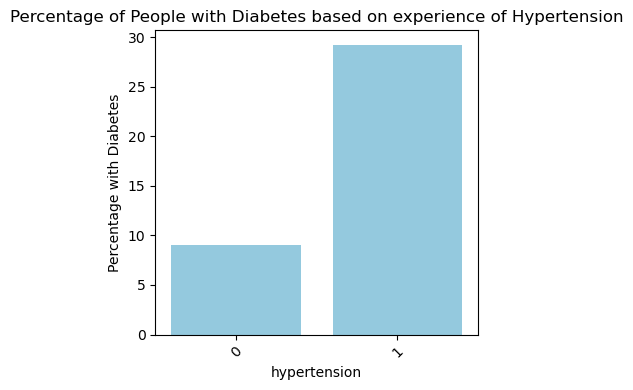

In [37]:
percentage_diabetes_by_hypertension = diabetic_individuals.groupby('hypertension').size() / df.groupby('hypertension').size() * 100

# Plotting
plt.figure(figsize=(4, 4))
sns.barplot(x=percentage_diabetes_by_hypertension.index, y=percentage_diabetes_by_hypertension.values, color='skyblue')
plt.title('Percentage of People with Diabetes based on experience of Hypertension')
plt.xlabel('hypertension')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
#Higher likelihood of Diabetes if hypertension has occurred before

In [39]:
#Heart Disease Analysis

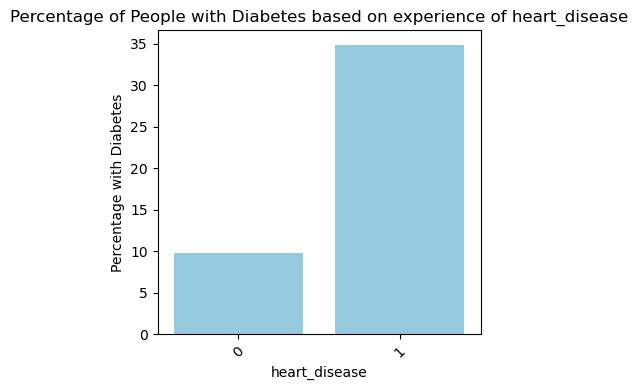

In [40]:
percentage_diabetes_by_heart_disease = diabetic_individuals.groupby('heart_disease').size() / df.groupby('heart_disease').size() * 100

# Plotting
plt.figure(figsize=(4, 4))
sns.barplot(x=percentage_diabetes_by_heart_disease.index, y=percentage_diabetes_by_heart_disease.values, color='skyblue')
plt.title('Percentage of People with Diabetes based on experience of heart_disease')
plt.xlabel('heart_disease')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#Higher likelihood of Diabetes if heart disease has occurred before

In [42]:
#Gender Analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

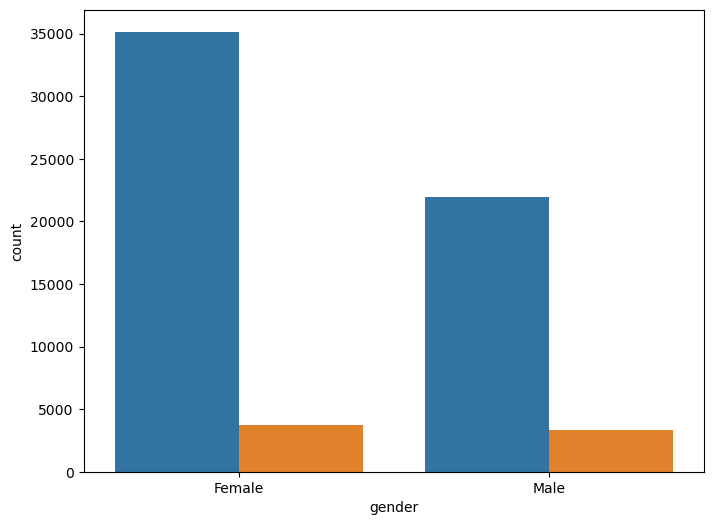

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="diabetes", data=df)
plt.title('Count of Diabetic and Non-Diabetic Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

In [44]:
# Filter the dataframe for diabetic individuals
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the percentage of people with diabetes in each gender category
percentage_diabetes_by_gender = diabetic_individuals.groupby('gender').size() / df.groupby('gender').size() * 100

print(percentage_diabetes_by_gender)

gender
Female     9.541336
Male      13.187204
dtype: float64


In [45]:
# Only small difference in percentage hence inconclusive that male are at higher risk of Diabetes

In [46]:
#Smoking_history Analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

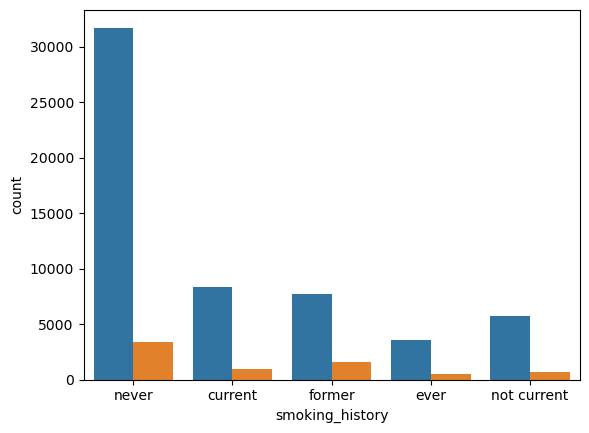

In [47]:
sns.countplot(x="smoking_history", hue="diabetes", data=df)

In [55]:
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the percentage of people with diabetes in each category of smoking history
percentage_diabetes_by_smoking = diabetic_individuals.groupby('smoking_history').size() / df.groupby('smoking_history').size() * 100

print(percentage_diabetes_by_smoking)

smoking_history
current        10.208917
ever           11.791157
former         17.001711
never           9.534937
not current    10.715950
dtype: float64


In [56]:
#Inconclusive that smoking affects Diabetes 
#Former smokers has highest risk but percentage of current smokers is smilar to those who have never smoked

In [57]:
# Multi-Variable Analysis

In [58]:
#From correlation Matrix, HbA and Blood Glucose level has highest correlation with Diabetes
#Thus we compare with other variables

<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

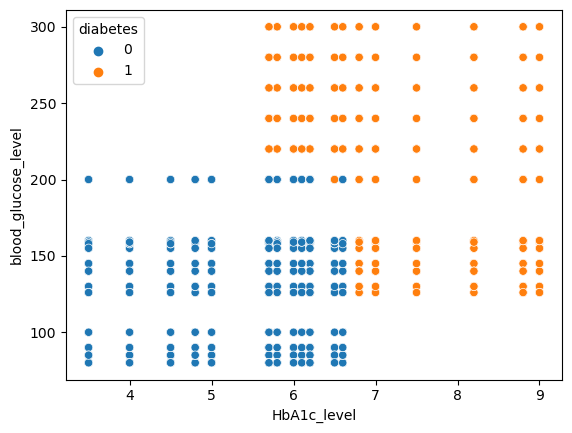

In [59]:
sns.scatterplot(data=df, x= "HbA1c_level", y="blood_glucose_level", hue = "diabetes")

In [60]:
#Those with either High Hb1Ac_Level OR High Blood Glucose Level OR BOTH mostly have Diabetes

In [61]:
#Comparison of Blood Glucose level with other variables

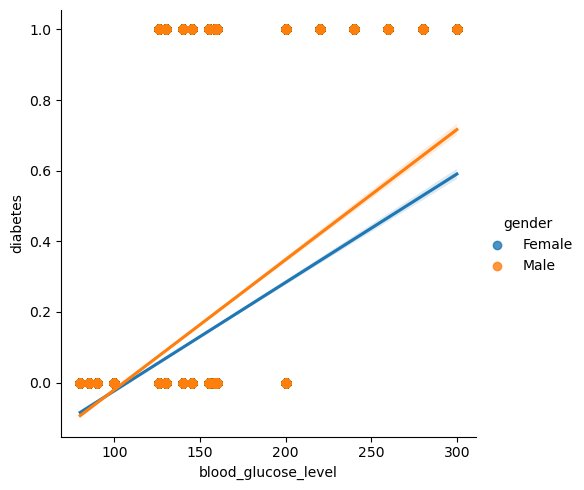

In [62]:
sns.lmplot(data=df, x="blood_glucose_level", y="diabetes", hue="gender")

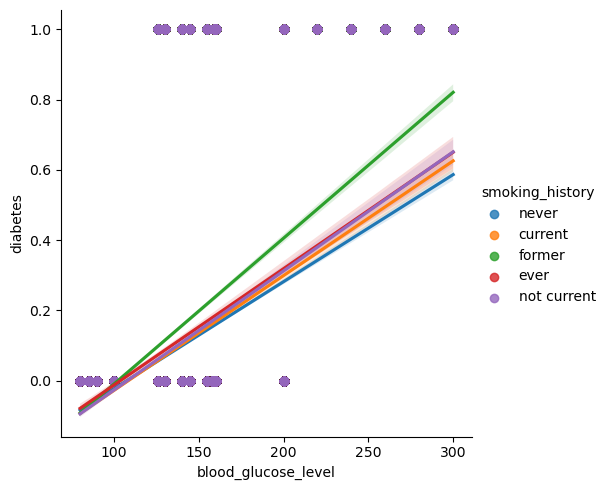

In [63]:
sns.lmplot(data=df, x= "blood_glucose_level", y="diabetes", hue = "smoking_history")

<Axes: xlabel='hypertension', ylabel='blood_glucose_level'>

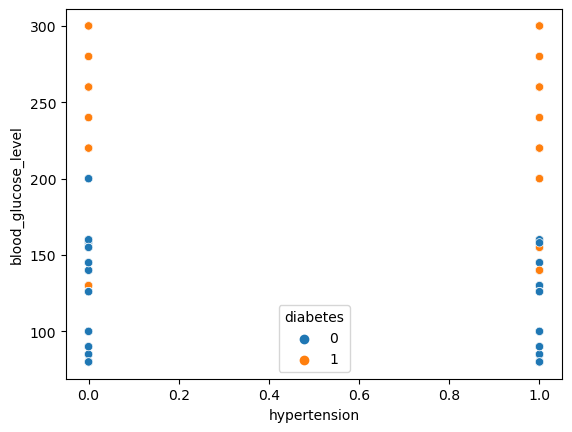

In [64]:
sns.scatterplot(data=df, x="hypertension", y="blood_glucose_level", hue ="diabetes")

<Axes: xlabel='heart_disease', ylabel='blood_glucose_level'>

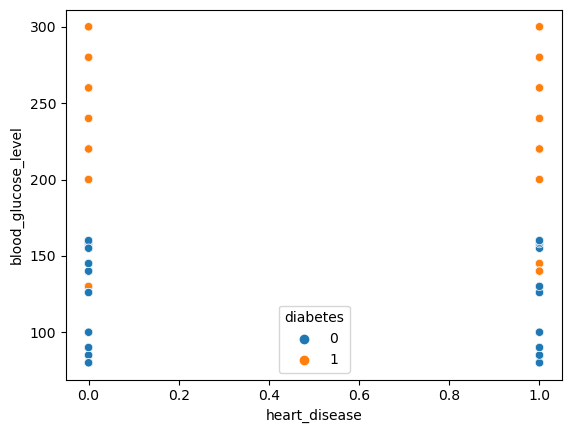

In [65]:
sns.scatterplot(data=df, x="heart_disease", y="blood_glucose_level", hue ="diabetes")

<Axes: xlabel='age', ylabel='blood_glucose_level'>

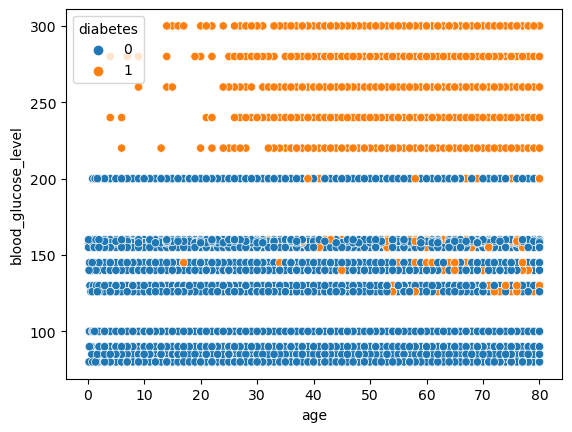

In [66]:
sns.scatterplot(data=df, x="age", y="blood_glucose_level", hue = "diabetes")

<Axes: xlabel='bmi', ylabel='blood_glucose_level'>

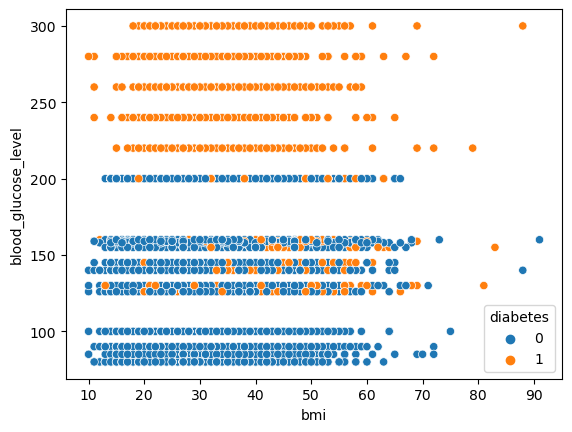

In [67]:
sns.scatterplot(data=df, x="bmi", y="blood_glucose_level", hue = "diabetes")

In [68]:
#Comparison of HbA1c_level with other variables

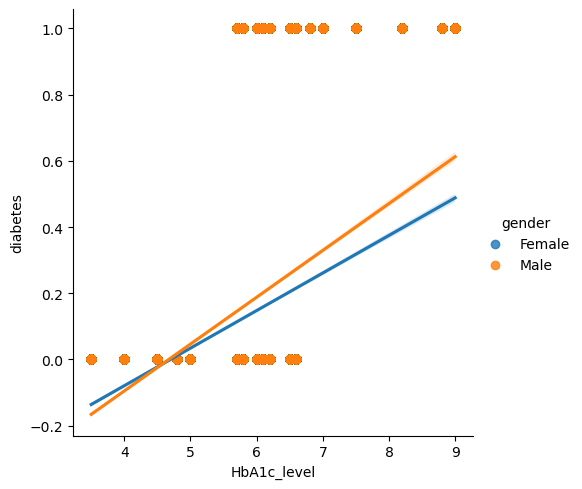

In [69]:
sns.lmplot(data=df, x="HbA1c_level", y="diabetes", hue="gender")

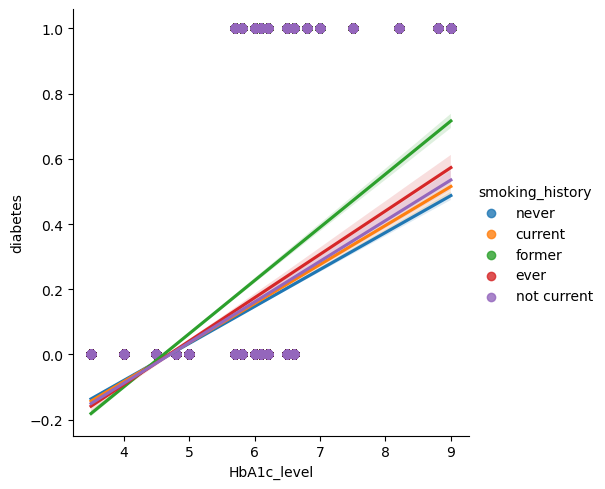

In [70]:
sns.lmplot(data=df, x="HbA1c_level", y="diabetes", hue="smoking_history")

<Axes: xlabel='hypertension', ylabel='HbA1c_level'>

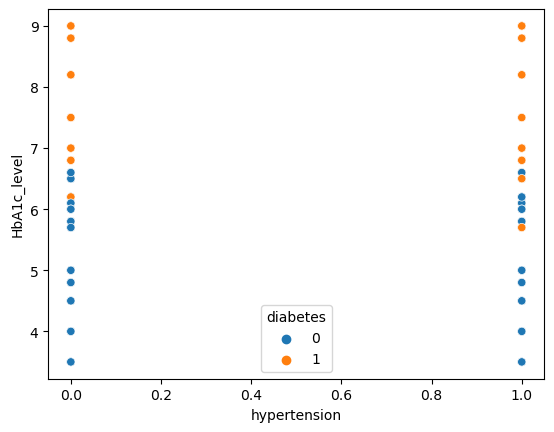

In [71]:
sns.scatterplot(data=df, x="hypertension", y="HbA1c_level", hue ="diabetes")

<Axes: xlabel='heart_disease', ylabel='HbA1c_level'>

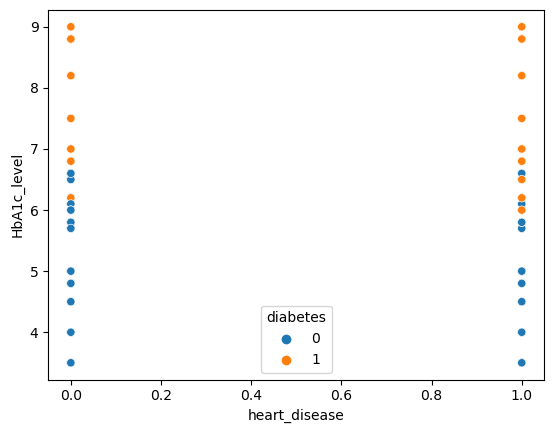

In [72]:
sns.scatterplot(data=df, x="heart_disease", y="HbA1c_level", hue ="diabetes")

<Axes: xlabel='age', ylabel='HbA1c_level'>

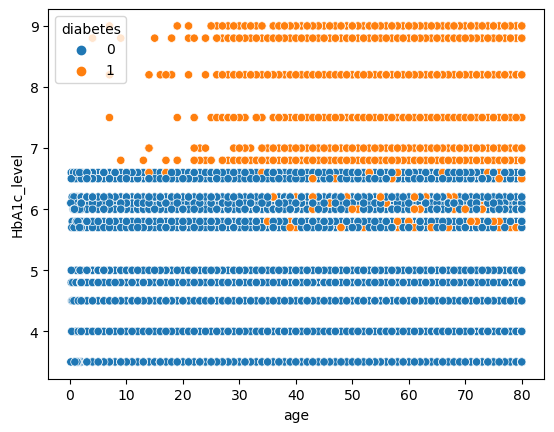

In [73]:
sns.scatterplot(data=df, x="age", y="HbA1c_level", hue = "diabetes")

<Axes: xlabel='bmi', ylabel='HbA1c_level'>

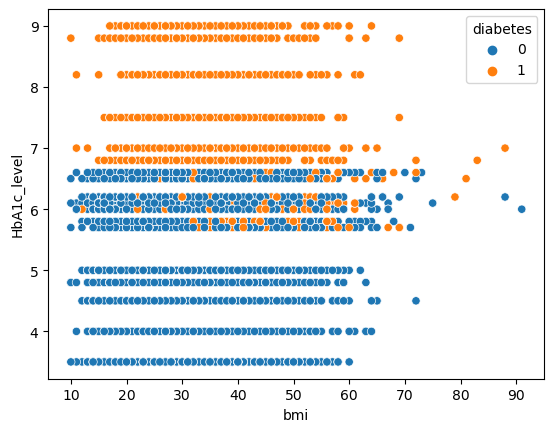

In [74]:
sns.scatterplot(data=df, x="bmi", y="HbA1c_level", hue = "diabetes")

In [75]:
#From Multi-Variable Analysis between Blood Glucose Level and other Variables
#Regardless of other variables, it is when Blood Glucose Level is high will trend of Diabetes rise
#there is slight correlation between other variables and presence of Diabetes
#However, Blood Glucose and HbA1C contributed more towards presence of Diabetes

In [76]:
#Data Prep for analysis

In [77]:
diabetes_values = df['diabetes']
print(diabetes_values.unique())
print(diabetes_values.value_counts())

[0 1]
diabetes
0    57126
1     7046
Name: count, dtype: int64


In [78]:
#Large data imbalance in target dataset 'diabetes'
#Apply resampling technique to balance distribution of classes
#Use Synthetic Minority Oversampling Technique (SMOTE) to 

In [79]:
X = df[['HbA1c_level','blood_glucose_level']]
y = df['diabetes'] 

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

smote = SMOTE(k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Logisitic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.816638221522034

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     11553
           1       0.83      0.80      0.81     11298

    accuracy                           0.82     22851
   macro avg       0.82      0.82      0.82     22851
weighted avg       0.82      0.82      0.82     22851


Confusion Matrix:
[[9640 1913]
 [2277 9021]]
Mean Squared Error: 0.18336177847796595


In [84]:
#Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.8369436786136274

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     11553
           1       0.87      0.79      0.83     11298

    accuracy                           0.84     22851
   macro avg       0.84      0.84      0.84     22851
weighted avg       0.84      0.84      0.84     22851


Confusion Matrix:
[[10209  1344]
 [ 2382  8916]]
Mean Squared Error: 0.16305632138637258


In [86]:
# Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.8179073125902586

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     11553
           1       0.89      0.72      0.80     11298

    accuracy                           0.82     22851
   macro avg       0.83      0.82      0.82     22851
weighted avg       0.83      0.82      0.82     22851


Confusion Matrix:
[[10508  1045]
 [ 3116  8182]]
Mean Squared Error: 0.18209268740974136


In [88]:
#Neural Network

In [89]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.8018467463130716

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78     11553
           1       0.75      0.91      0.82     11298

    accuracy                           0.80     22851
   macro avg       0.82      0.80      0.80     22851
weighted avg       0.82      0.80      0.80     22851


Confusion Matrix:
[[ 8092  3461]
 [ 1067 10231]]
Mean Squared Error: 0.19815325368692835


In [90]:
#From various models used, Random Forest Classifier has highest Accuracy

In [91]:
#Using Random Forest Classifier to analyse other Variables

In [99]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

# One-hot encode encoded categorical variables
encoder = OneHotEncoder(sparse_output=False)
X_categorical_encoded = encoder.fit_transform(df[['gender_encoded', 'smoking_history_encoded']])

# Combine one-hot encoded features with other numerical features
X_combined = np.concatenate((X_categorical_encoded, df[['blood_glucose_level', 'HbA1c_level']].values), axis=1)
X_ALL = np.concatenate((X_categorical_encoded, df[['hypertension','HbA1c_level','heart_disease','age','bmi','blood_glucose_level']].values), axis=1)

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X1 = df[['HbA1c_level']]
X2 = df[['blood_glucose_level']]
X3 = df[['blood_glucose_level','HbA1c_level']]
X4 = df[['age','bmi','blood_glucose_level','HbA1c_level']]
X5 = X_combined
X6 = df[['hypertension','HbA1c_level','heart_disease','blood_glucose_level']]
X7 = X_ALL

y = df['diabetes']

def train_evaluate_model(X, y):
    smote = SMOTE(k_neighbors=5)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Variables = [X1, X2, X3, X4, X5, X6, X7]
target = df['diabetes']

for i, X in enumerate(Variables, start=1):
    print(f"Performance with feature set X{i}:")
    train_evaluate_model(X, target)
    print("\n")


Performance with feature set X1:
Accuracy: 0.7279331320292328

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     11553
           1       0.86      0.54      0.66     11298

    accuracy                           0.73     22851
   macro avg       0.76      0.73      0.72     22851
weighted avg       0.76      0.73      0.72     22851


Confusion Matrix:
[[10542  1011]
 [ 5206  6092]]


Performance with feature set X2:
Accuracy: 0.6987877992210406

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.68     11553
           1       0.67      0.78      0.72     11298

    accuracy                           0.70     22851
   macro avg       0.70      0.70      0.70     22851
weighted avg       0.70      0.70      0.70     22851


Confusion Matrix:
[[7170 4383]
 [2500 8798]]


Performance with feature set X3:
Accuracy: 0.8407071900573279

Classificat

# Based on the various X used for machine learning, more variables lead to better results
# Using single variable leads to low accuracy
# Adding all variables as predictors to train dataset results in highest accuracy of 97.6% vs 84.0% (Hb1Ac and Blood glucose level)
# Most significant variables to consider Hb1Ac_level and Blood_glucose_level likely due to high correlation with Diabetes (From Data analysis)
# To increase accuracy, next variables to consider are BMI & Age likely due to increasing complexity of machine learning
# Gender & Smoking History are less significant likely due to low correlation with Diabetes (From Data analysis)
# Hypertension and Heart_Disease are less significant likely due to already high correlation with Hb1Ac and Blood Glucose Level